In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/TATAMOTORS.NS.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
15,2021-01-22,295.950012,306.899994,278.350006,289.350006,289.350006,316008609
16,2021-01-25,296.899994,299.500000,277.350006,279.149994,279.149994,164346913
17,2021-01-27,274.899994,275.000000,265.700012,267.500000,267.500000,126586833
18,2021-01-28,260.049988,273.399994,259.049988,266.799988,266.799988,129156876
19,2021-01-29,273.000000,278.799988,260.600006,262.700012,262.700012,138442348


In [3]:
dates=[]
prices=[]


In [4]:
#get the no. of rows and columns in the data set
df.shape

(20, 7)

In [5]:
#print all of the data except for the last row
df=df.head(len(df)-1)
print(df.shape)

(19, 7)


In [6]:
df_dates=df.loc[:,'Date'] # get all rows from date column 
df_low=df.loc[:,'Adj Close']#get all rows of Adj Close

In [7]:
for date in df_dates:
   dates.append([int(date.split('-')[2])])

#create the dependent data set 'y' as prices
for close_price in df_low:
   prices.append(float(close_price))

In [8]:
print(dates)

[[1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [27], [28]]


In [9]:
#function to make prediction using 3 different kernals
def predict_prices(dates, prices, x): #x is testing date for test model  
    svr_lin=SVR(kernel='linear', C=1e3)
    svr_poly=SVR(kernel='poly', C=1e3,degree=2)
    svr_rbf=SVR(kernel='rbf', C=1e3, gamma=0.1)

    #TRAIN the models on the dates and prices
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
   
    #plot the graph 
    plt.scatter(dates,prices,color='blue',label='Data',s=60)
    plt.scatter(dates,svr_rbf.predict(dates),color='black',label='RBF model')
    plt.scatter(dates,svr_lin.predict(dates),color='green',label='Linear Model')
    plt.scatter(dates,svr_poly.predict(dates),color='yellow',label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('price')
    plt.title('Support vactor Regression (sun pharma Data)')
    plt.legend()
    plt.show()
    return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0]


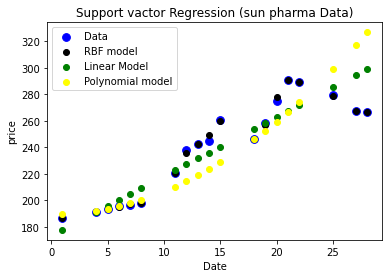

(268.48171195918354, 303.4499880000596, 336.7949920073927)


In [10]:
predicted_price = predict_prices(dates,prices,[[29]])
print(predicted_price)